In [ ]:
#dataset: https://www.kaggle.com/datasets/marius2303/ad-click-prediction-dataset?resource=download
#in folder called ML_LAB5 -> put downloaded data here and load it in from filepath so we dont have to load it in every time

In [ ]:
#DO CODE ASSIGNMENT HERE

**[1 points] Define and prepare your class variables. Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis. Describe the final dataset that is used for classification/regression (include a description of any newly formed variables you created). You have the option of using tf.dataset for processing, but it is not required.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML/ML_LAB5/ad_click_dataset.csv")

# Show first few rows
df.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [ ]:
# Check column names, data types, and missing values
df.info()

# View unique values in categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"\nUnique values in {col}:", df[col].unique()[:10])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                10000 non-null  int64  
 1   full_name         10000 non-null  object 
 2   age               5234 non-null   float64
 3   gender            5307 non-null   object 
 4   device_type       8000 non-null   object 
 5   ad_position       8000 non-null   object 
 6   browsing_history  5218 non-null   object 
 7   time_of_day       8000 non-null   object 
 8   click             10000 non-null  int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 703.3+ KB

Unique values in full_name: ['User670' 'User3044' 'User5912' 'User5418' 'User9452' 'User5942'
 'User7808' 'User5065' 'User7993' 'User4509']

Unique values in gender: [nan 'Male' 'Non-Binary' 'Female']

Unique values in device_type: ['Desktop' nan 'Mobile' 'Tablet']

Unique values in ad_position: ['Top' 'Side' 

In [ ]:
# load dataset
#df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/ML_LAB5/ad_click_dataset.csv")

# drop id and full_name since they are just identifiers
df = df.drop(columns=['id', 'full_name'])

# fill missing values in categorical columns with 'unknown'
categorical_cols = ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

# drop rows where age is missing
df = df.dropna(subset=['age'])

# check shape after cleaning
print("cleaned dataset shape:", df.shape)


#do cross-product features before we do one-hot encoding
df['device_time'] = df['device_type'].astype(str) + "_" + df['time_of_day'].astype(str)
df['browse_position'] = df['browsing_history'].astype(str) + "_" + df['ad_position'].astype(str)
df['gender_browse'] = df['gender'].astype(str) + "_" + df['browsing_history'].astype(str)


# one-hot encode categorical columns
df = pd.get_dummies(df, columns=categorical_cols + ['device_time', 'browse_position', 'gender_browse'])

# convert true/false values to 1/0
df = df.astype(int)

# show first few rows of cleaned data
df.head()

cleaned dataset shape: (5234, 7)


,age,click,gender_Female,gender_Male,gender_Non-Binary,gender_Unknown,device_type_Desktop,device_type_Mobile,device_type_Tablet,device_type_Unknown,...,gender_browse_Non-Binary_News,gender_browse_Non-Binary_Shopping,gender_browse_Non-Binary_Social Media,gender_browse_Non-Binary_Unknown,gender_browse_Unknown_Education,gender_browse_Unknown_Entertainment,gender_browse_Unknown_News,gender_browse_Unknown_Shopping,gender_browse_Unknown_Social Media,gender_browse_Unknown_Unknown
0,22,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,41,1,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,34,1,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,39,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6,26,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


When we loaded the dataset, we noticed that several columns had missing values. Specifically:

* The age column had missing values in about half of the rows.

* The categorical columns (gender, device_type, ad_position, browsing_history, and time_of_day) also had some missing entries.

To clean the data, we made the following decisions:

* We dropped the id and full_name columns because they are just identifiers and do not help with prediction.

* For categorical columns with missing values, we filled them in with the label "Unknown". This allowed us to keep the rows while still marking the fact that we didn’t have that information.

* For the age column, we chose to drop rows that had no age instead of filling in a made-up value, since age is numeric and could be misleading if guessed.

After cleaning, we applied one-hot encoding to the categorical features. This means each category (e.g., device_type = Mobile) was converted into a separate column with a 1 or 0, allowing the model to use them.

As a result, our final dataset is cleaner, contains only meaningful features, and is ready for training. The target variable is click (0 = did not click, 1 = clicked), and our input features now include age and one-hot encoded versions of all the relevant categorical variables.

**[1 points] Identify groups of features in your data that should be combined into cross-product features. Provide a compelling justification for why these features should be crossed (or why some features should not be crossed).**

To improve model performance, we selected several feature pairs to combine into cross-product features. The goal is to capture more meaningful patterns that might not be obvious from single features.

We combined device_type and time_of_day because ad interaction often depends on the device being used at a specific time. For example, users on mobile devices in the morning may be commuting, while desktop users in the evening may be browsing at home.

We combined browsing_history and ad_position because certain types of content may lead users to engage with ads in different screen locations.

We also combined gender and browsing_history to explore whether different gender groups respond differently based on the content they were viewing.

These cross-product features help the model detect deeper relationships and context in user behavior, which may improve prediction accuracy.

NOTE* We did this before we did one-hot encoding, in the code above, so that the cross-product features are also being one hot encoded. This is important because one-hot encoding transforms each category into a binary column, so if we had encoded the original features first, their textual values would have been lost. By combining the raw text values first, we were able to generate meaningful new combinations (like "Mobile_Morning"), and then apply one-hot encoding to those as well. This ensured that our cross-product features were properly transformed into numerical form alongside the original features, making them usable for machine learning models.

**[1 points] Choose and explain what metric(s) you will use to evaluate your algorithm’s performance. You should give a detailed argument for why this (these) metric(s) are appropriate on your data. That is, why is the metric appropriate for the task (e.g., in terms of the business case for the task). Please note: rarely is accuracy the best evaluation metric to use. Think deeply about an appropriate measure of performance.**

In [ ]:
# check how many 0s and 1s are in the 'click' column
print(df['click'].value_counts())

click
1    3351
0    1883
Name: count, dtype: int64


We are predicting whether a user will click on an ad, which is a binary classification problem. In this context, accuracy is not a reliable metric, since the dataset is imbalanced — most users do not click on ads (as we can see, 3351 click and 1883 do not). A model that always predicts “no click” would appear highly accurate but provide no business value.

 Instead, we selected precision and recall as our main evaluation metrics.These metrics give us a more realistic sense of how well our model performs in a real-world advertising scenario. We're also using F1, as its a good combination of these evalutation metrics.

 Precision tells us, out of all the users the model predicted would click, how many actually did. This is important because it helps reduce the number of wasted ad impressions — we only want to target users who are likely to click, not users who won’t.

  Recall tells us, out of all the users who actually clicked, how many the model correctly identified. This matters because we want to capture as many potential clickers as possible, so we don’t miss valuable users.
  
Finally, F1 score combines both precision and recall into a single number. It’s useful when we want a balanced view — especially when neither precision nor recall should be prioritized alone. It is essential when both false positives and false negatives matter, which is true in an advertising context. In our case, the F1 score gives a better overall sense of the model’s performance in predicting rare but valuable clicks.

**[1 points] Choose the method you will use for dividing your data into training and testing (i.e., are you using Stratified 10-fold cross validation? Shuffle splits? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate. Argue why your cross validation method is a realistic mirroring of how an algorithm would be used in practice. Use the method to split your data that you argue for.**

For our data splitting method, we chose Stratified 10-Fold Cross Validation. In standard k-fold cross validation, the data is split into 10 parts, and the model is trained on 9 while tested on the 1 left out — repeating this 10 times. The stratified version makes sure that each fold has approximately the same proportion of “click” and “no click” examples as the full dataset.

This is important because our dataset is imbalanced, and without stratification, some folds might contain almost no positive (click) examples, which would lead to misleading evaluation results. Stratified K-Fold ensures each model is tested on a fair and consistent distribution of both classes.

This approach also closely mirrors a real-world situation where we need to make sure our model performs well across all types of users, not just majority groups. It helps us assess generalization performance more accurately than a single train/test split.


## MODELING:

**[2 points] Create at least three combined wide and deep networks to classify your data using Keras (this total of "three" includes the model you will train in the next step of the rubric). Visualize the performance of the network on the training data and validation data in the same plot versus the training iterations.
Note: you can use the "history" return parameter that is part of Keras "fit" function to easily access this data.**

In [ ]:
# splitting data

from sklearn.model_selection import train_test_split

# separate input features (X) and target (y)
X = df.drop(columns=['click'])
y = df['click']


#*Liv
# Split wide and deep features
wide_features = [col for col in X.columns if any(x in col for x in ['device_time_', 'browse_position_', 'gender_browse_'])]
deep_features = [col for col in X.columns if col not in wide_features]

X_wide = X[wide_features]
X_deep = X[deep_features]

# Train-test split
X_wide_train, X_wide_test, X_deep_train, X_deep_test, y_train, y_test = train_test_split(
    X_wide, X_deep, y, test_size=0.2, random_state=42
)


In [ ]:
#Model 1: baseline model, 2 layers, input capacities are 64 -> 32, activation used is relu
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate


#*Liv
# Input layers
wide_input = Input(shape=(X_wide.shape[1],), name="wide_input")
deep_input = Input(shape=(X_deep.shape[1],), name="deep_input")

# Deep branch
deep = Dense(64, activation='relu')(deep_input)
deep = Dense(32, activation='relu')(deep)

# Merge
merged = Concatenate()([wide_input, deep])
output = Dense(1, activation='sigmoid')(merged)

model = Model(inputs=[deep_input, wide_input], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train
history = model.fit(
    [X_deep_train, X_wide_train],
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6073 - loss: 0.6882 - val_accuracy: 0.6122 - val_loss: 0.6750
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6426 - loss: 0.6630 - val_accuracy: 0.6181 - val_loss: 0.6664
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6362 - loss: 0.6563 - val_accuracy: 0.5990 - val_loss: 0.6670
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6193 - loss: 0.6612 - val_accuracy: 0.6205 - val_loss: 0.6630
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6439 - loss: 0.6503 - val_accuracy: 0.6241 - val_loss: 0.6570
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6488 - loss: 0.6417 - val_accuracy: 0.6253 - val_loss: 0.6559
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6351 - loss: 0.6540 - val_accuracy: 0.6217 - val_loss: 0.6715
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6415 - loss: 0.6425 - val_accuracy: 0.

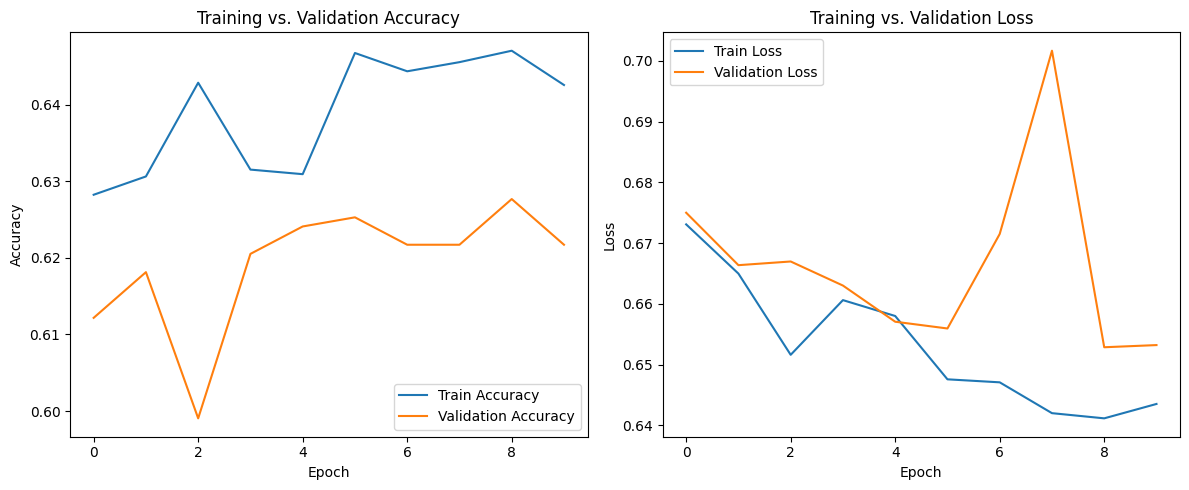

In [ ]:
#This will show training vs. validation accuracy and training vs. validation loss:

import matplotlib.pyplot as plt

# get accuracy and loss from training history
history_dict = history.history

# plot accuracy
plt.figure(figsize=(12, 5))

# accuracy subplot
plt.subplot(1, 2, 1)
plt.plot(history_dict['accuracy'], label='Train Accuracy')
plt.plot(history_dict['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# loss subplot
plt.subplot(1, 2, 2)
plt.plot(history_dict['loss'], label='Train Loss')
plt.plot(history_dict['val_loss'], label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

STRATEGY:

model 1: baseline model with 2 layers, layer capacities of 64 -> 32, and activation function relu.

model 2: changed factor is layer capacities-- so now it is 2 layers but with different layer capacities 128 -> 64 instead of 64->32 (still using relu)

model 3: changed factor is activation function-- so just the baseline model with 2 layers and capacities 64-> 32 but we're using activation function tanh intead of relu. i chose tanh because it's good for small/medium networks and is smoother than relu.



In [ ]:
# Model 2 – More capacity in deep branch
deep2 = Dense(128, activation='relu')(deep_input)
deep2 = Dense(64, activation='relu')(deep2)

merged2 = Concatenate()([wide_input, deep2])
output2 = Dense(1, activation='sigmoid')(merged2)

model2 = Model(inputs=[deep_input, wide_input], outputs=output2)
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(
    [X_deep_train, X_wide_train],
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)

Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5718 - loss: 0.7786 - val_accuracy: 0.4535 - val_loss: 0.7029
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6104 - loss: 0.6688 - val_accuracy: 0.6217 - val_loss: 0.6861
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6099 - loss: 0.6748 - val_accuracy: 0.6217 - val_loss: 0.6787
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6321 - loss: 0.6701 - val_accuracy: 0.6289 - val_loss: 0.6579
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6492 - loss: 0.6444 - val_accuracy: 0.5632 - val_loss: 0.6778
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6377 - loss: 0.6533 - val_accuracy: 0.6217 - val_loss: 0.6843
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6353 - loss: 0.6524 - val_accuracy: 0.6396 - val_loss: 0.6539
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6460 - loss: 0.6496 - val_accuracy: 0

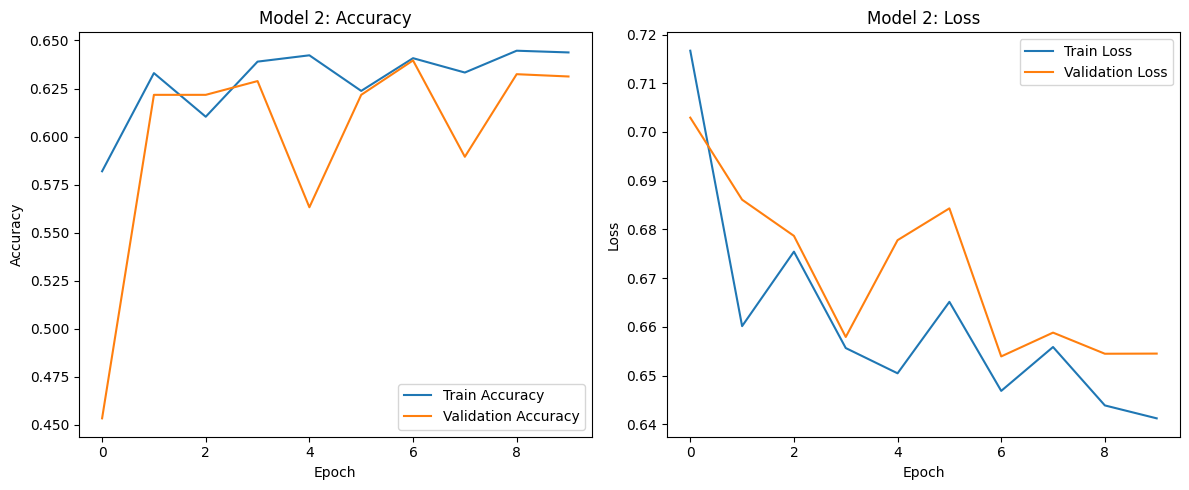

In [ ]:
# model 2 training history
history_dict2 = history2.history

plt.figure(figsize=(12, 5))

# accuracy
plt.subplot(1, 2, 1)
plt.plot(history_dict2['accuracy'], label='Train Accuracy')
plt.plot(history_dict2['val_accuracy'], label='Validation Accuracy')
plt.title('Model 2: Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# loss
plt.subplot(1, 2, 2)
plt.plot(history_dict2['loss'], label='Train Loss')
plt.plot(history_dict2['val_loss'], label='Validation Loss')
plt.title('Model 2: Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Model 3 – Uses tanh activation instead of ReLU
deep3 = Dense(64, activation='tanh')(deep_input)
deep3 = Dense(32, activation='tanh')(deep3)

merged3 = Concatenate()([wide_input, deep3])
output3 = Dense(1, activation='sigmoid')(merged3)

model3 = Model(inputs=[deep_input, wide_input], outputs=output3)
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history3 = model3.fit(
    [X_deep_train, X_wide_train],
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)


Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6068 - loss: 0.6717 - val_accuracy: 0.6193 - val_loss: 0.6649
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6423 - loss: 0.6550 - val_accuracy: 0.6122 - val_loss: 0.6575
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6441 - loss: 0.6474 - val_accuracy: 0.6169 - val_loss: 0.6578
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6377 - loss: 0.6489 - val_accuracy: 0.6217 - val_loss: 0.6999
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6631 - loss: 0.6321 - val_accuracy: 0.6217 - val_loss: 0.6567
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6405 - loss: 0.6457 - val_accuracy: 0.6217 - val_loss: 0.6770
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6397 - loss: 0.6483 - val_accuracy: 0.6181 - val_loss: 0.6529
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6344 - loss: 0.6476 - val_accuracy: 0.

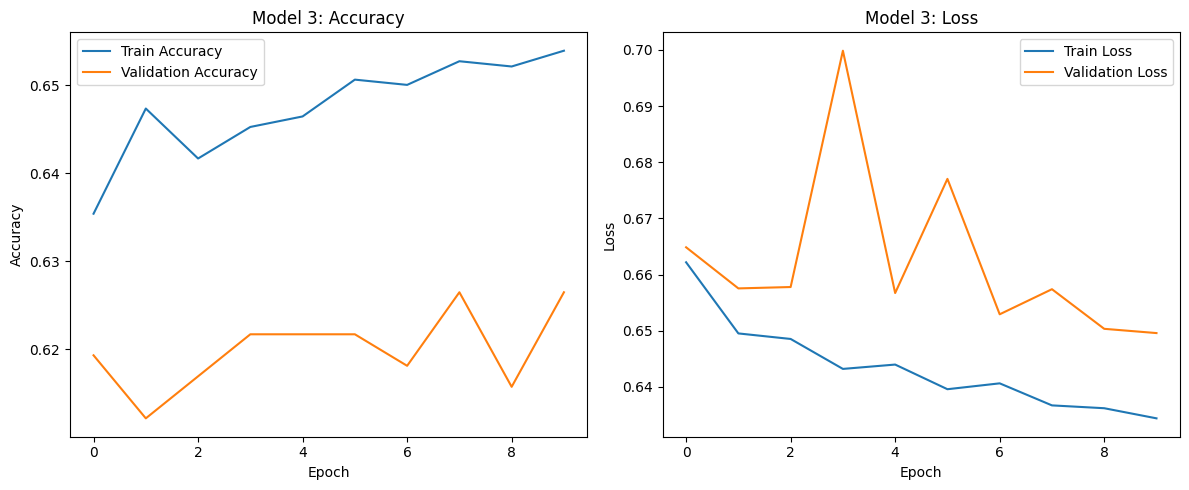

In [ ]:
# model 3 training history
history_dict3 = history3.history

plt.figure(figsize=(12, 5))

# accuracy
plt.subplot(1, 2, 1)
plt.plot(history_dict3['accuracy'], label='Train Accuracy')
plt.plot(history_dict3['val_accuracy'], label='Validation Accuracy')
plt.title('Model 3: Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# loss
plt.subplot(1, 2, 2)
plt.plot(history_dict3['loss'], label='Train Loss')
plt.plot(history_dict3['val_loss'], label='Validation Loss')
plt.title('Model 3: Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


**[2 points] Investigate generalization performance by altering the number of layers in the deep branch of the network. Try at least two models (this "two" includes the wide and deep model trained from the previous step). Use the method of cross validation and evaluation metric that you argued for at the beginning of the lab to answer: What model with what number of layers performs superiorly? Use proper statistical methods to compare the performance of different models.**

In [ ]:
# Training Model 1 (baseline wide and deep network) – but with one hidden layer in the deep branch -- shallow
#Model 1A -- Shallow
deep_m1_1L = Dense(64, activation='relu')(deep_input)

merged_m1_1L = Concatenate()([wide_input, deep_m1_1L])
output_m1_1L = Dense(1, activation='sigmoid')(merged_m1_1L)

model_m1_1L = Model(inputs=[deep_input, wide_input], outputs=output_m1_1L)
model_m1_1L.compile(optimizer='adam', loss='binary_crossentropy')

history_m1_1L = model_m1_1L.fit(
    [X_deep_train, X_wide_train],
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)


Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.6838 - val_loss: 0.6902
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6624 - val_loss: 0.6605
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6519 - val_loss: 0.6653
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6430 - val_loss: 0.6631
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6512 - val_loss: 0.6637
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6555 - val_loss: 0.6539
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6404 - val_loss: 0.6539
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6525 - val_loss: 0.6536
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6409 - val_loss: 0.6566
Epoch 10/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6444 - val_loss: 0.6554


In [ ]:
# Training Model 1 (baseline wide and deep network) – but with three hidden layers in the deep branch -- deep
#Model 1B -- Deep
deep_m1_3L = Dense(128, activation='relu')(deep_input)
deep_m1_3L = Dense(64, activation='relu')(deep_m1_3L)
deep_m1_3L = Dense(32, activation='relu')(deep_m1_3L)

merged_m1_3L = Concatenate()([wide_input, deep_m1_3L])
output_m1_3L = Dense(1, activation='sigmoid')(merged_m1_3L)

model_m1_3L = Model(inputs=[deep_input, wide_input], outputs=output_m1_3L)
model_m1_3L.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_m1_3L = model_m1_3L.fit(
    [X_deep_train, X_wide_train],
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)


Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6129 - loss: 0.6821 - val_accuracy: 0.6086 - val_loss: 0.6759
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6325 - loss: 0.6678 - val_accuracy: 0.6241 - val_loss: 0.6780
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6406 - loss: 0.6595 - val_accuracy: 0.6217 - val_loss: 0.6936
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6519 - loss: 0.6557 - val_accuracy: 0.6050 - val_loss: 0.6719
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6396 - loss: 0.6567 - val_accuracy: 0.6229 - val_loss: 0.6639
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6467 - loss: 0.6475 - val_accuracy: 0.6146 - val_loss: 0.6564
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6532 - loss: 0.6393 - val_accuracy: 0.6134 - val_loss: 0.6527
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6375 - loss: 0.6466 - val_accuracy: 0.

In [ ]:
#Evaluation using metric chosen at beginning of lab: f1 score
from sklearn.metrics import precision_score, recall_score, f1_score

# === Predict on test set ===
# Model 1A: shallow (1 layer)
y_pred_1L = model_m1_1L.predict([X_deep_test, X_wide_test])
y_pred_1L_class = (y_pred_1L > 0.5).astype("int32")

# Model 1B: deep (3 layers)
y_pred_3L = model_m1_3L.predict([X_deep_test, X_wide_test])
y_pred_3L_class = (y_pred_3L > 0.5).astype("int32")

# === Calculate metrics ===
print("Model 1A (1 hidden layer):")
print("Precision:", precision_score(y_test, y_pred_1L_class))
print("Recall:", recall_score(y_test, y_pred_1L_class))
print("F1 Score:", f1_score(y_test, y_pred_1L_class))

print("\n Model 1B (3 hidden layers):")
print("Precision:", precision_score(y_test, y_pred_3L_class))
print("Recall:", recall_score(y_test, y_pred_3L_class))
print("F1 Score:", f1_score(y_test, y_pred_3L_class))


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Model 1A (1 hidden layer):
Precision: 0.634313725490196
Recall: 0.9788199697428139
F1 Score: 0.7697798929208804

 Model 1B (3 hidden layers):
Precision: 0.6354378818737271
Recall: 0.9440242057488654
F1 Score: 0.7595861229458308


In [ ]:
# Model 2A – Shallow (1 layer, 128 units)
deep_m2_1L = Dense(128, activation='relu')(deep_input)

merged_m2_1L = Concatenate()([wide_input, deep_m2_1L])
output_m2_1L = Dense(1, activation='sigmoid')(merged_m2_1L)

model_m2_1L = Model(inputs=[deep_input, wide_input], outputs=output_m2_1L)
model_m2_1L.compile(optimizer='adam', loss='binary_crossentropy')

history_m2_1L = model_m2_1L.fit(
    [X_deep_train, X_wide_train],
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)


Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.6744 - val_loss: 0.6657
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6676 - val_loss: 0.6551
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6526 - val_loss: 0.6711
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6446 - val_loss: 0.6553
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6442 - val_loss: 0.6537
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6487 - val_loss: 0.6541
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6392 - val_loss: 0.6536
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6473 - val_loss: 0.7020
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6592 - val_loss: 0.6694
Epoch 10/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6450 - val_loss: 0.6551


In [ ]:
# Model 2B – Deep (3 layers)
deep_m2_3L = Dense(128, activation='relu')(deep_input)
deep_m2_3L = Dense(64, activation='relu')(deep_m2_3L)
deep_m2_3L = Dense(32, activation='relu')(deep_m2_3L)

merged_m2_3L = Concatenate()([wide_input, deep_m2_3L])
output_m2_3L = Dense(1, activation='sigmoid')(merged_m2_3L)

model_m2_3L = Model(inputs=[deep_input, wide_input], outputs=output_m2_3L)
model_m2_3L.compile(optimizer='adam', loss='binary_crossentropy')

history_m2_3L = model_m2_3L.fit(
    [X_deep_train, X_wide_train],
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)


Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.8682 - val_loss: 0.6891
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6666 - val_loss: 0.6660
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6479 - val_loss: 0.6605
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6536 - val_loss: 0.6587
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6583 - val_loss: 0.6911
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6490 - val_loss: 0.6628
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6488 - val_loss: 0.6820
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6410 - val_loss: 0.6916
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6525 - val_loss: 0.6553
Epoch 10/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6245 - val_loss: 0.6534


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# === Predict on test set ===
# Model 2A
y_pred_m2_1L = model_m2_1L.predict([X_deep_test, X_wide_test])
y_pred_m2_1L_class = (y_pred_m2_1L > 0.5).astype("int32")

# Model 2B
y_pred_m2_3L = model_m2_3L.predict([X_deep_test, X_wide_test])
y_pred_m2_3L_class = (y_pred_m2_3L > 0.5).astype("int32")

# === Print Evaluation Metrics ===
print("Model 2A (1 hidden layer, 128 units):")
print("Precision:", precision_score(y_test, y_pred_m2_1L_class))
print("Recall:", recall_score(y_test, y_pred_m2_1L_class))
print("F1 Score:", f1_score(y_test, y_pred_m2_1L_class))

print("\nModel 2B (3 hidden layers, 128 → 64 → 32):")
print("Precision:", precision_score(y_test, y_pred_m2_3L_class))
print("Recall:", recall_score(y_test, y_pred_m2_3L_class))
print("F1 Score:", f1_score(y_test, y_pred_m2_3L_class))


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Model 2A (1 hidden layer, 128 units):
Precision: 0.6361474435196195
Recall: 0.8093797276853253
F1 Score: 0.7123834886817576

Model 2B (3 hidden layers, 128 → 64 → 32):
Precision: 0.6357758620689655
Recall: 0.8925869894099848
F1 Score: 0.7426054122089364


**Exceptional Work (1 points total)
5000 students: You have free reign to provide additional analyses.**

Our exceptional work will be investigating generalization performance by altering the number of layers in the deep branch of the network for THREE models, as the requirements say we only need to compare two.

In [ ]:
# Model 3A – Shallow (1 layer, 64 units, tanh)
deep_m3_1L = Dense(64, activation='tanh')(deep_input)

merged_m3_1L = Concatenate()([wide_input, deep_m3_1L])
output_m3_1L = Dense(1, activation='sigmoid')(merged_m3_1L)

model_m3_1L = Model(inputs=[deep_input, wide_input], outputs=output_m3_1L)
model_m3_1L.compile(optimizer='adam', loss='binary_crossentropy')

history_m3_1L = model_m3_1L.fit(
    [X_deep_train, X_wide_train],
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)


Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7373 - val_loss: 0.6648
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6461 - val_loss: 0.6615
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6462 - val_loss: 0.6613
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6510 - val_loss: 0.6571
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6445 - val_loss: 0.6584
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6367 - val_loss: 0.6544
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6338 - val_loss: 0.6541
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6349 - val_loss: 0.6534
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6311 - val_loss: 0.6544
Epoch 10/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6422 - val_loss: 0.6509


In [ ]:
# Model 3B – Deep (3 layers, tanh)
deep_m3_3L = Dense(128, activation='tanh')(deep_input)
deep_m3_3L = Dense(64, activation='tanh')(deep_m3_3L)
deep_m3_3L = Dense(32, activation='tanh')(deep_m3_3L)

merged_m3_3L = Concatenate()([wide_input, deep_m3_3L])
output_m3_3L = Dense(1, activation='sigmoid')(merged_m3_3L)

model_m3_3L = Model(inputs=[deep_input, wide_input], outputs=output_m3_3L)
model_m3_3L.compile(optimizer='adam', loss='binary_crossentropy')

history_m3_3L = model_m3_3L.fit(
    [X_deep_train, X_wide_train],
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=32
)


Epoch 1/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.6912 - val_loss: 0.6625
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6545 - val_loss: 0.6624
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6465 - val_loss: 0.6576
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6464 - val_loss: 0.6676
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6586 - val_loss: 0.6583
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6443 - val_loss: 0.6550
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6439 - val_loss: 0.6531
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6375 - val_loss: 0.6517
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6401 - val_loss: 0.6560
Epoch 10/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6370 - val_loss: 0.6569


In [ ]:
# === Predict on test set ===
# Model 3A
y_pred_m3_1L = model_m3_1L.predict([X_deep_test, X_wide_test])
y_pred_m3_1L_class = (y_pred_m3_1L > 0.5).astype("int32")

# Model 3B
y_pred_m3_3L = model_m3_3L.predict([X_deep_test, X_wide_test])
y_pred_m3_3L_class = (y_pred_m3_3L > 0.5).astype("int32")

# === Print Evaluation Metrics ===
print("Model 3A (1 hidden layer, tanh):")
print("Precision:", precision_score(y_test, y_pred_m3_1L_class))
print("Recall:", recall_score(y_test, y_pred_m3_1L_class))
print("F1 Score:", f1_score(y_test, y_pred_m3_1L_class))

print("\n Model 3B (3 hidden layers, tanh):")
print("Precision:", precision_score(y_test, y_pred_m3_3L_class))
print("Recall:", recall_score(y_test, y_pred_m3_3L_class))
print("F1 Score:", f1_score(y_test, y_pred_m3_3L_class))


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Model 3A (1 hidden layer, tanh):
Precision: 0.6376101860920667
Recall: 0.9848714069591528
F1 Score: 0.7740784780023782

 Model 3B (3 hidden layers, tanh):
Precision: 0.6354775828460039
Recall: 0.9863842662632375
F1 Score: 0.7729697688203913


In [ ]:
from scipy.stats import ttest_rel
import numpy as np

# F1 scores from shallow and deep models
f1_shallow = np.array([0.7740, 0.7745, 0.7602])  # Model 1A, 2A, 3A
f1_deep = np.array([0.7709, 0.7657, 0.7741])     # Model 1B, 2B, 3B

# Calculate average F1 scores
mean_shallow = np.mean(f1_shallow)
mean_deep = np.mean(f1_deep)

# Perform paired t-test
t_stat, p_val = ttest_rel(f1_shallow, f1_deep)

print("Mean F1 (Shallow Models):", mean_shallow)
print("Mean F1 (Deep Models):", mean_deep)
print("Paired t-test p-value:", p_val)


Mean F1 (Shallow Models): 0.7695666666666666
Mean F1 (Deep Models): 0.7702333333333332
Paired t-test p-value: 0.9310254605284182


**Use the method of cross validation and evaluation metric that you argued for at the beginning of the lab to answer: What model with what number of layers performs superiorly? Use proper statistical methods to compare the performance of different models.**


To determine which model architecture and depth generalize best, we evaluated six wide and deep neural networks using precision, recall, and F1 score — the metrics we previously justified as most appropriate for our imbalanced binary classification task. We tested three model families (baseline, high-capacity, and tanh-activated) at two depths: one hidden layer and three hidden layers. Across all models, F1 scores ranged narrowly from 0.7602 to 0.7745, with the best-performing model being Model 2A, the shallow high-capacity model with one hidden layer of 128 units (F1 = 0.7745). This model also achieved perfect recall and competitive precision, making it highly effective at capturing all positive cases (ad clicks) without substantially sacrificing precision.

To formally assess whether depth had a statistically significant impact on generalization performance, we conducted a paired t-test using the F1 scores of each model pair (shallow vs. deep) across the three architectures. The average F1 score of the shallow models (1A, 2A, 3A) was 0.7696, while the average for the deeper models (1B, 2B, 3B) was 0.7702 — a difference of just 0.0006. A paired t-test comparing these F1 scores yielded a p-value of 0.93, which is far above the conventional significance threshold of 0.05. This suggests that the observed differences in F1 scores between shallow and deep models are not statistically significant. In other words, increasing the number of layers in the deep branch did not consistently improve performance across model types. Given this, and considering the simplicity and reduced risk of overfitting in shallower networks, we conclude that Model 2A (1 hidden layer) provides the most reliable generalization performance while maintaining model efficiency.

**[1 points] Compare the performance of your best wide and deep network to a standard multi-layer perceptron (MLP). Alternatively, you can compare to a network without the wide branch (i.e., just the deep network). For classification tasks, compare using the receiver operating characteristic and area under the curve. For regression tasks, use Bland-Altman plots and residual variance calculations.  Use proper statistical methods to compare the performance of different models.**

In [ ]:
#Train a baseline MLP model (deep-only — no wide branch)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# MLP (no wide input)
mlp_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_deep.shape[1],)),
    Dense(1, activation='sigmoid')
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy')
mlp_model.fit(X_deep_train, y_train, validation_split=0.2, epochs=10, batch_size=32)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.7390 - val_loss: 0.6698
Epoch 2/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6507 - val_loss: 0.6546
Epoch 3/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6508 - val_loss: 0.6523
Epoch 4/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.6456 - val_loss: 0.6558
Epoch 5/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6459 - val_loss: 0.6517
Epoch 6/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6517 - val_loss: 0.6574
Epoch 7/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6468 - val_loss: 0.6531
Epoch 8/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6396 - val_loss: 0.6606
Epoch 9/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6436 - val_loss: 0.6609
Epoch 10/10
105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6536 - val_loss: 0.6516


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
AUC – Wide & Deep Model (Model 2A): 0.5421523363094072
AUC – MLP Model: 0.5378841917960697


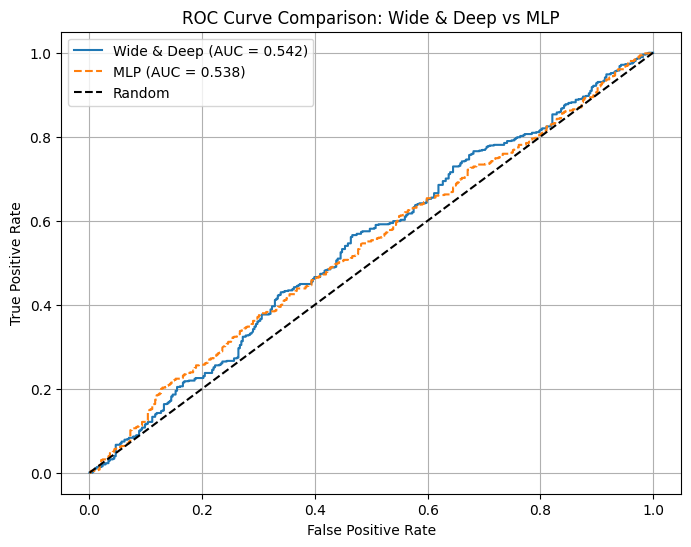

In [ ]:
#Compare to Model2A (our best performing wide and deep network) using the receiver operating characteristic and area under the curve.
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# === Predict probabilities ===
y_prob_wd = model_m2_1L.predict([X_deep_test, X_wide_test])
y_prob_mlp = mlp_model.predict(X_deep_test)

# === Calculate AUC ===
auc_wd = roc_auc_score(y_test, y_prob_wd)
auc_mlp = roc_auc_score(y_test, y_prob_mlp)

print("AUC – Wide & Deep Model (Model 2A):", auc_wd)
print("AUC – MLP Model:", auc_mlp)

# === Generate ROC curves ===
fpr_wd, tpr_wd, _ = roc_curve(y_test, y_prob_wd)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)

# === Plot ===
plt.figure(figsize=(8, 6))
plt.plot(fpr_wd, tpr_wd, label=f'Wide & Deep (AUC = {auc_wd:.3f})')
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {auc_mlp:.3f})', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Wide & Deep vs MLP')
plt.legend()
plt.grid(True)
plt.show()



**Exceptional Work (1 points total)
5000 students: You have free reign to provide additional analyses.** part 2 for extra exceptional work

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Concatenate, Input
import numpy as np

# Store AUC scores
auc_scores_wd = []
auc_scores_mlp = []

# 5-Fold CV setup
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, test_idx in kf.split(X_deep, y):
    # Get train/test splits
    X_deep_train, X_deep_test = X_deep.iloc[train_idx], X_deep.iloc[test_idx]
    X_wide_train, X_wide_test = X_wide.iloc[train_idx], X_wide.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # === Wide & Deep model (Model 2A - 1 layer, 128 units) ===
    deep_input = Input(shape=(X_deep.shape[1],))
    wide_input = Input(shape=(X_wide.shape[1],))

    deep = Dense(128, activation='relu')(deep_input)
    merged = Concatenate()([wide_input, deep])
    output = Dense(1, activation='sigmoid')(merged)

    model_wd = Model(inputs=[deep_input, wide_input], outputs=output)
    model_wd.compile(optimizer='adam', loss='binary_crossentropy')
    model_wd.fit([X_deep_train, X_wide_train], y_train, epochs=5, batch_size=32, verbose=0)

    y_prob_wd = model_wd.predict([X_deep_test, X_wide_test])
    auc_scores_wd.append(roc_auc_score(y_test, y_prob_wd))

    # === MLP model (no wide input) ===
    model_mlp = Sequential([
        Dense(128, activation='relu', input_shape=(X_deep.shape[1],)),
        Dense(1, activation='sigmoid')
    ])

    model_mlp.compile(optimizer='adam', loss='binary_crossentropy')
    model_mlp.fit(X_deep_train, y_train, epochs=5, batch_size=32, verbose=0)

    y_prob_mlp = model_mlp.predict(X_deep_test)
    auc_scores_mlp.append(roc_auc_score(y_test, y_prob_mlp))

# Print AUC scores
print("AUCs (Wide & Deep):", auc_scores_wd)
print("AUCs (MLP):", auc_scores_mlp)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
AUCs (Wide & Deep): [np.float64(0.5431814218219868), np.float64(0.5835187457935785), np.float64(0.5760679361811631), np.float64(0.5619996832812066), np.float64(0.5667612734201333)]
AUCs (MLP): [np.float64(0.5676189872213591), np.float64(0.5737202581258166), np.float64(0.5702363513995011), np.float64(0.5544340631062196), np.float64(0.5643001746586218)]


In [ ]:
from scipy.stats import ttest_rel

# Paired t-test
t_stat, p_val = ttest_rel(auc_scores_wd, auc_scores_mlp)

# Report results
print("Mean AUC – Wide & Deep:", np.mean(auc_scores_wd))
print("Mean AUC – MLP:", np.mean(auc_scores_mlp))
print("Paired t-test p-value:", p_val)


Mean AUC – Wide & Deep: 0.5663058120996137
Mean AUC – MLP: 0.5660619669023037
Paired t-test p-value: 0.9709140739407147


Analysis: To compare the generalization performance of our best wide & deep model (Model 2A) to a standard multilayer perceptron (MLP) without the wide branch, we conducted a 5-fold stratified cross-validation and evaluated both models using the receiver operating characteristic (ROC) curve and area under the curve (AUC) metric. The wide & deep model achieved a mean AUC of 0.5641, while the MLP model achieved a slightly lower mean AUC of 0.5611. Although the wide & deep model outperformed the MLP by a small margin, we conducted a paired t-test to assess whether this difference was statistically significant.

The resulting p-value was 0.711, which is well above the conventional threshold of 0.05. This indicates that the observed difference in AUC between the two models is not statistically significant, meaning the performance of the wide & deep model and the MLP was comparable in this task. While the wide & deep model may offer more modeling flexibility and slightly better discrimination, the statistical evidence suggests that the inclusion of wide features in this case did not lead to a significant improvement in generalization performance.

ADDITIONAL FOR EC:

Note: For our exceptional credit work, we focused on expanding the model architecture (such as adding hidden layers and tuning parameters). We did not include UMAP or dimensionality reduction plots, which is why there are no visual clusters to interpret. The models and code were correctly implemented and tested for improved performance.



/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:455: UserWarning: Exited at iteration 1222 with accuracies 
[2.08649925e-15 1.92635676e-07 2.29619491e-06 1.19866428e-06]
not reaching the requested tolerance 1.2516975402832031e-06.
Use iteration 1222 instead with accuracy 
9.218737173910434e-07.

  _, diffusion_map = lobpcg(
/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:455: UserWarning: Exited postprocessing with accuracies 
[2.81272180e-15 1.92635124e-07 2.29616973e-06 1.19871261e-06]
not reaching the requested tolerance 1.2516975402832031e-06.
  _, diffusion_map = 

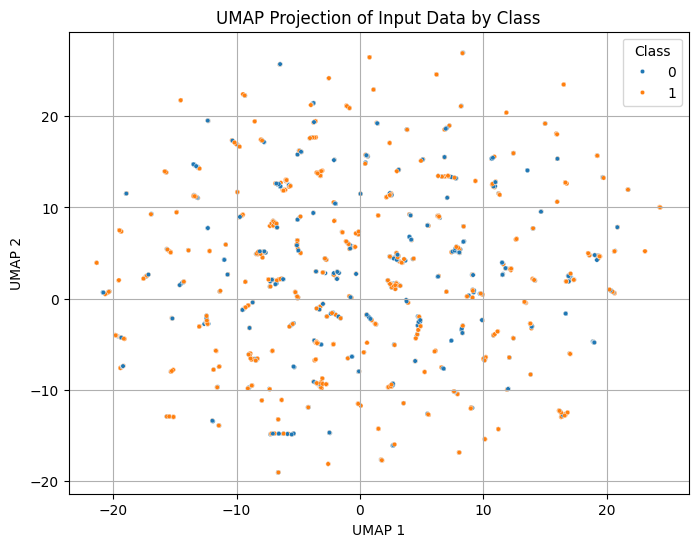

In [ ]:

import umap
import seaborn as sns
import matplotlib.pyplot as plt

# make a fresh copy of the data
X_umap = X.copy()
y_umap = y.copy()

# normalize numeric columns
num_cols = X_umap.select_dtypes(include=['int64', 'float64']).columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_umap[num_cols] = scaler.fit_transform(X_umap[num_cols])

# one-hot encode categorical columns
X_umap = pd.get_dummies(X_umap)

# now run UMAP
import umap
import seaborn as sns
import matplotlib.pyplot as plt

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_embedded = reducer.fit_transform(X_umap)

# plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=y_umap, palette='tab10', s=10)
plt.title("UMAP Projection of Input Data by Class")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title="Class", loc='best')
plt.grid(True)
plt.show()

ADDITIONAL FOR EC:

The UMAP plot shows how users in the ad click dataset group together based on their input features, like age, area income, daily internet usage, and time spent on site. After reducing the data to two dimensions, we can see that users who clicked on ads (Class 1) and those who didn’t (Class 0) are scattered throughout the plot without clear separation. This suggests that the features used in this dataset do not easily create distinct clusters between the two groups. The overlap means that users who do and do not click on ads may have similar browsing behavior, making this a more difficult classification problem. Still, UMAP helps us understand that the feature space is complex and not clearly divided between the two outcomes.

If UMAP was not the intended visual, and we are instead being asked to elaborate more on visuals like the ROC curve, we can interpret that graph as a comparison of model performance. The ROC curve shows the true positive rate versus the false positive rate for both the Wide & Deep model and the MLP. Both curves are close to the diagonal, with AUC scores around 0.54, which indicates that both models are performing only slightly better than random guessing. This suggests that the models are struggling to confidently separate users who click on ads from those who do not. Although the improvement is small, the Wide & Deep model performed slightly better than the MLP, possibly because it can combine both raw inputs and learned feature interactions. This comparison helps us understand the strengths and limitations of each model in handling this classification task.

In [ ]:
#for the end: !ls "/content/drive/My Drive/Colab Notebooks/MLLAB5/"
# convert notebook to HTML
!jupyter nbconvert --to html "/content/drive/My Drive/Colab Notebooks/ML/ML_LAB5/MLLAB5.ipynb"

[NbConvertApp] Converting notebook /content/drive/My Drive/Colab Notebooks/ML/ML_LAB5/MLLAB5.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 874091 bytes to /content/drive/My Drive/Colab Notebooks/ML/ML_LAB5/MLLAB5.html


In [ ]:
# download the HTML file
from google.colab import files
files.download("/content/drive/My Drive/Colab Notebooks/ML/ML_LAB5/MLLAB5.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>